# Analiza humanih lekova registrovanih u Srbiji

Cilj projekta je analiza registrovanih humanih lekova u Republici Srbiji. Podaci su dobijeni sa sajta https://data.gov.rs/ u csv formatu. 

In [1]:
import pandas as pd

In [2]:
lekovi = pd.read_csv('lekovi_humani2.csv', header=1)

In [3]:
lekovi.head()

,Vrsta resenja,Naziv leka,INN,Rezim izdavanja leka,Oblik i doza leka,Broj resenja o stavljanju leka u promet,Datum resenja o stavljanju leka u promet,Datum vazenja resenja,Proizvodjac,Nosilac dozvole,ATC,EAN,JKL,Vrsta leka,Sifra proizvoda,Sifra proizvodjaca u saradnji,Oblik saradnje,Sifra proizvodjaca,Sifra nosioca dozvole
0,REGISTRACIJA,Komplet za obeležavanje MIBI sa 99mTc,(tetrakis (1-izocijanid-2-metoksi-2-metilpropi...,SZ,"radiofarmaceutski kit; 1mg; bočica staklena, 5...",515-01-02807-16-001,2018-04-26,2023-04-26,INSTITUT ZA NUKLEARNE NAUKE VINČA LABORATORIJA...,INSTITUT ZA NUKLEARNE NAUKE VINČA LABORATORIJA...,V09GA01,8.607000e+12,9199001.0,NaN,392610,/,NaN,23961,23961
1,OBNOVA,Strepsils® Cool,"2,4-dihlorbenzilalkohol, amilmetakrezol",BR,"lozenga; 1.2mg+0.6mg; blister, 2x8kom",515-01-00073-16-003,2017-01-04,2022-01-04,RECKITT BENCKISER HEALTHCARE INTERNATIONAL LTD...,NELT CO. D.O.O. BEOGRAD,R02AA03,5.000158e+12,1120406.0,Humani lekovi,370383,/,NaN,5578,8528
2,OBNOVA,"Strepsils® Jagoda, bez šećera","2,4-dihlorbenzilalkohol, amilmetakrezol",BR,"lozenga; 1.2mg+0.6mg; blister, 2x8kom",515-01-00074-16-003,2017-01-04,2022-01-04,RECKITT BENCKISER HEALTHCARE INTERNATIONAL LTD...,NELT CO. D.O.O. BEOGRAD,R02AA03,5.000158e+12,1120415.0,Humani lekovi,371554,/,NaN,5578,8528
3,OBNOVA,Strepsils® limun bez šećera,"2,4-dihlorbenzilalkohol, amilmetakrezol",BR,"lozenga; 1.2mg+0.6mg; blister, 2x8kom",515-01-01382-16-001,2017-01-04,2022-01-04,RECKITT BENCKISER HEALTHCARE INTERNATIONAL LTD...,NELT CO. D.O.O. BEOGRAD,R02AA03,5.000158e+12,1120405.0,Humani lekovi,373853,/,NaN,5578,8528
4,OBNOVA,Strepsils® med i limun,"2,4-dihlorbenzilalkohol, amilmetakrezol",BR,"lozenga; 1.2mg+0.6mg; blister, 2x12kom",515-01-01380-16-001,2017-01-04,2022-01-04,RECKITT BENCKISER HEALTHCARE INTERNATIONAL LTD...,NELT CO. D.O.O. BEOGRAD,R02AA03,5.000158e+12,1120401.0,Humani lekovi,373831,/,NaN,5578,8528


In [4]:
lekovi.columns = ['vrsta_resenja', 'naziv', 'inn', 'rezim_izdavanja',
       'oblik_i_doza', 'broj_resenja',
       'datum_resenja', 'datum_vazenja_resenja',
       'proizvodjac', 'nosilac_dozvole', 'atc', 'ean', 'jkl', 'vrsta_leka',
       'sifra_proizvoda', 'sifra_proizvodjaca_u_saradnji', 'oblik_saradnje',
       'sifra_proizvodjaca', 'sifra_nosioca_dozvole']

## Anatomske grupe lekova

Osnovne grupe ATC klasifikacije su:
- A – Alimentarni trakt i metabolizam
- B – Krv i krvotvorni organi
- C – Kardiovaskularni sistem
- D – Koža i potkožno tkivo
- G – Genitourinarni sistem i polni organi
- H – Hormonski preparati za sistemsku primenu, isključujući polne hormone i insulin
- J – Antiinfektivni lekovi za sistemsku primenu
- L – Antineoplastici i imunomodulatori
- M – Mišićno-kostni sistem
- N – Nervni sistem
- P – Antiparazitni proizvodi, insekticidi i sredstva za zaštitu od insekata
- R – Respiratorni sistem
- S – Senzorni organi
- V – Ostalo

In [5]:
def prvo_slovo(s):
    p = s[0]
    return p

In [6]:
lekovi['anatomska_grupa'] = lekovi['atc'].apply(prvo_slovo)

In [7]:
grupe = lekovi['anatomska_grupa'].value_counts()

In [8]:
grupe

C    1022
N     919
L     688
J     623
A     619
B     475
R     399
G     307
M     275
V     187
D     123
S     122
H      97
/      84
P       4
Name: anatomska_grupa, dtype: int64

Iz podataka vidimo da je najviše registrovanih kardioloških, neuroloških i lekova koji se koriste kao neoplastici i imunomodulatori.

In [9]:
lekovi[lekovi['anatomska_grupa'] == '/']

,vrsta_resenja,naziv,inn,rezim_izdavanja,oblik_i_doza,broj_resenja,datum_resenja,datum_vazenja_resenja,proizvodjac,nosilac_dozvole,atc,ean,jkl,vrsta_leka,sifra_proizvoda,sifra_proizvodjaca_u_saradnji,oblik_saradnje,sifra_proizvodjaca,sifra_nosioca_dozvole,anatomska_grupa
13,REGISTRACIJA,Kindinorm®,"Chamomilla dil. D12, Kalium phosphoricum dil. ...",BR,granule; 25mg/10g+25mg/10g+25mg/10g+25mg/10g; ...,515-01-0044-12-002,2014-06-09,2019-06-13,DEUTSCHE HOMOOPATHIE-UNION DHU-ARZNEIMITTEL GM...,ALPEN PHARMA DOO BEOGRAD (PALILULA),/,4.029917e+12,NaN,Homeopatski lekovi,336375,/,NaN,7311,20762,/
14,OBNOVA,Colikind®,"Chamomilla dil. D6, Cina dil. D6, Colocynthis ...",BR,oralni rastvor; 10g/100g+10g/100g+10g/100g+10g...,515-01-01114-14-001,2014-10-17,2019-10-23,DEUTSCHE HOMOOPATHIE-UNION DHU-ARZNEIMITTEL GM...,ALPEN PHARMA DOO BEOGRAD (PALILULA),/,4.029917e+12,NaN,Homeopatski lekovi,342269,/,NaN,7311,20762,/
86,REGISTRACIJA,Aflu Theiss,"aconitum napellus dil. D6, baptisia tinctoria ...",BR,"oralne kapi, rastvor; 2g/10g+2g/10g+2g/10g+2g/...",515-01-04921-14-001,2016-07-12,2021-07-12,DR. THEISS NATURWAREN GMBH - Nemačka,DR THEISS DOO BEOGRAD (ZEMUN),/,4.016370e+12,NaN,Homeopatski lekovi,364553,/,NaN,16772,20653,/
87,OBNOVA,Influcid®,"aconitum trit. D3, gelsemium trit. D3, ipecacu...",BR,tableta; 25mg+25mg+25mg+25mg+25mg+25mg; bliste...,515-01-03934-17-001,2018-10-03,2023-10-03,DEUTSCHE HOMOOPATHIE-UNION DHU-ARZNEIMITTEL GM...,ALPEN PHARMA DOO BEOGRAD (PALILULA),/,4.029917e+12,NaN,Homeopatski lekovi,399353,/,NaN,32349,20762,/
438,REGISTRACIJA,Arnikamed Dolo,"arnika (Arnica montana L.), tinktura cvasti",BR,"gel; 24g/100g; tuba, 1x100g",515-01-01807-17-001,2018-05-30,2023-05-30,DR. THEISS NATURWAREN GMBH - Nemačka,DR THEISS DOO BEOGRAD (ZEMUN),/,4.016370e+12,NaN,Tradicionalni biljni lekovii,392419,/,NaN,16772,20653,/
439,REGISTRACIJA,Arnikamed Dolo,"arnika (Arnica montana L.), tinktura cvasti",BR,"gel; 24g/100g; tuba, 1x50g",515-01-01809-17-001,2018-05-30,2023-05-30,DR. THEISS NATURWAREN GMBH - Nemačka,DR THEISS DOO BEOGRAD (ZEMUN),/,4.016370e+12,NaN,Tradicionalni biljni lekovii,392421,/,NaN,16772,20653,/
440,OBNOVA,Gastrokind®,"arsenicum album trit. D6, croton tiglium trit....",BR,"tableta; 20mg+20mg+20mg+20mg; bočica staklena,...",515-01-01112-14-001,2014-10-06,2019-10-08,DEUTSCHE HOMOOPATHIE-UNION DHU-ARZNEIMITTEL GM...,ALPEN PHARMA DOO BEOGRAD (PALILULA),/,4.029917e+12,NaN,Homeopatski lekovi,343065,/,NaN,7311,20762,/
445,OBNOVA,Cynarix®,"artičoka (Cynara scolymus L.), suvi ekstrakt l...",BR,"obložena tableta; 55mg; blister, 2x12kom",515-01-01125-17-001,2017-12-18,2022-12-18,PHARMAZEUTISCHE FABRIK MONTAVIT GES.M.B.H. - A...,PREDSTAVNIŠTVO PHARMAZEUTISCHE FABRIK MONTAVIT...,/,9.001505e+12,NaN,Tradicionalni biljni lekovii,384922,/,NaN,30906,10299,/
454,REGISTRACIJA,Tecentriq®,atezolizumab,SZ,koncentrat za rastvor za infuziju; 1200mg/20mL...,515-01-04298-17-001,2018-03-02,2023-03-02,F.HOFFMANN-LA ROCHE LTD. - Švajcarska,ROCHE D.O.O. BEOGRAD,/,8.606104e+12,39406.0,Biološki lekovi,390557,/,NaN,7731,7887,/
526,OBNOVA,Tonsilotren®,"atropin-sulfat trit. D5, hepar sulfuris trit. ...",BR,"tableta; 12.5mg+10mg+50mg+5mg+25mg; blister, 3...",515-01-03937-17-001,2018-10-03,2023-10-03,DEUTSCHE HOMOOPATHIE-UNION DHU-ARZNEIMITTEL GM...,ALPEN PHARMA DOO BEOGRAD (PALILULA),/,4.029917e+12,NaN,Homeopatski lekovi,399358,/,NaN,32349,20762,/


Najveći broj lekova bez ATC klasifikacije (/) se mogu svrstati u tri grupe: homeopatski lekovi, biljni lekovi i biološki lekovi.

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

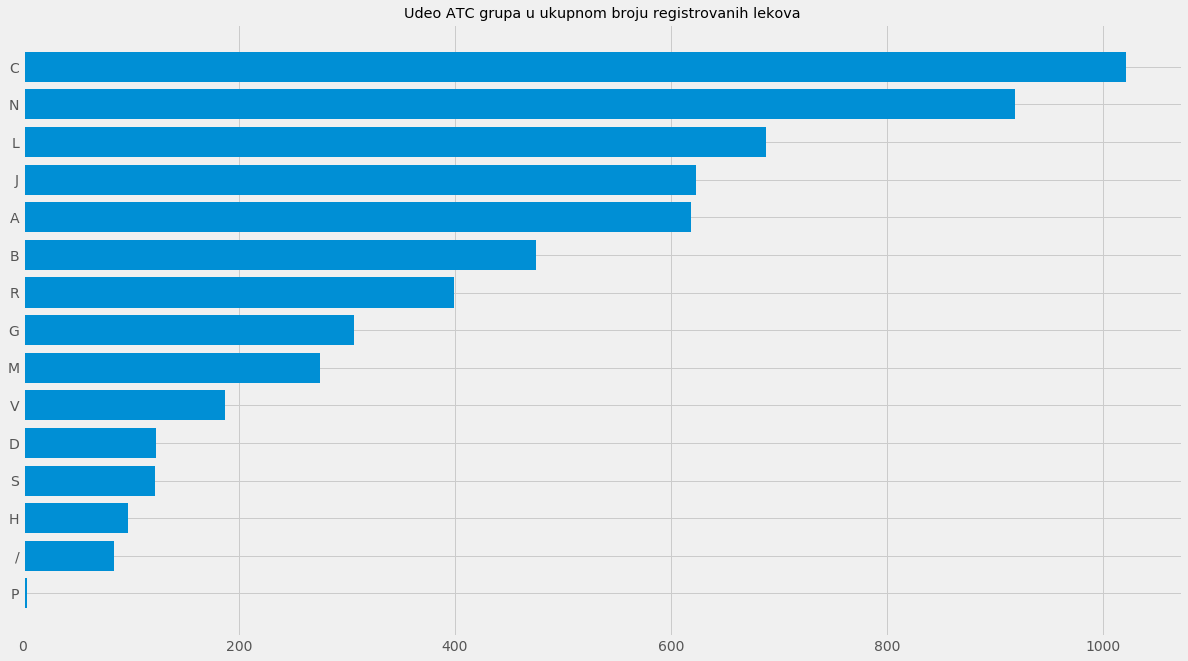

In [85]:
fig1, ax1 = plt.subplots()
plt.style.use('ggplot')
plt.title('Udeo ATC grupa u ukupnom broju registrovanih lekova')
ax1.invert_yaxis()
plt.barh(grupe.index, grupe, tick_label = grupe.index)
fig1.set_size_inches(18.5, 10.5)
plt.show()

Grupe lekova sa najvećim udelom su:
- C – Kardiovaskularni sistem - 17.19%
- N – Nervni sistem - 15.46%
- L – Antineoplastici i imunomodulatori - 11.57%
- J – Antiinfektivni lekovi za sistemsku primenu - 10.48%
- A – Alimentarni trakt i metabolizam - 10.41%

## Farmaceutski oblici registrovanih lekova

U zavisnosti od načina primene, lekovi mogu biti u različitim farmaceutskim formulacijama.

In [13]:
def oblik(s):
    a = s.split(';')[0]
    return a

In [14]:
lekovi['oblik'] = lekovi['oblik_i_doza'].apply(oblik)

In [15]:
lekovi['oblik'].value_counts(dropna=False).head(10)

film tableta                                            1523
tableta                                                  741
kapsula, tvrda                                           305
rastvor za infuziju                                      264
rastvor za injekciju                                     245
koncentrat za rastvor za infuziju                        197
tableta sa produženim oslobađanjem                       170
rastvor za injekciju u napunjenom injekcionom špricu     116
gastrorezistentna tableta                                116
prašak i rastvarač za rastvor za injekciju               102
Name: oblik, dtype: int64

Budući da postoji 159 različitih naziva za oblike lekova, čini se da je naziv oblika leka često opisuje više svojstava datog oblika. Tako za kapsulu imamo oblike u kojima ona može biti tvrda ili meka, gastrorezistentna ili ne. Da bismo dobili konkretnije podatke, moramo grupisati nazive oblika lekova u opštije nazive - kapsula, tableta,... 

In [16]:
pd.options.mode.chained_assignment = None

In [27]:
oblici_recnik = {r'lozenga': 'lozenga',
                'tablet.+': 'tableta',
                r'kapsul.+':'kapsula',
                r'injek.+|infuz.+':'injekcioni oblik',
                r'sirup|oralni rastvor|oralna suspenzija|prašak za oralnu suspenziju|granule za oralni rastvor|prašak za oralni rastvor|granule za oralnu suspenziju':'oralni rastvori',
                r'.+ za inhalaciju':'inhalatorni oblik',
                r'kapi za oči':'kapi za oči',
                r'sprej za nos':'sprej za nos'}

In [32]:
for kljuc in oblici_recnik:
    lekovi['oblik'][lekovi['oblik'].str.contains(kljuc)] = oblici_recnik[kljuc]

In [34]:
oblici = lekovi['oblik'].value_counts()

In [35]:
oblici_top10 = oblici.head(10)

In [36]:
top10_list =  list(oblici_top10.index)

In [37]:
top10_list

['tableta',
 'injekcioni oblik',
 'kapsula',
 'oralni rastvori',
 'kapi za oči',
 'gel',
 'lozenga',
 'krem',
 'sprej za nos',
 'medicinski gas, delimično tečni']

In [38]:
lekovi['oblik'][~lekovi['oblik'].isin(top10_list)] = 'ostalo'

In [40]:
oblici = lekovi['oblik'].value_counts(normalize=True)*100

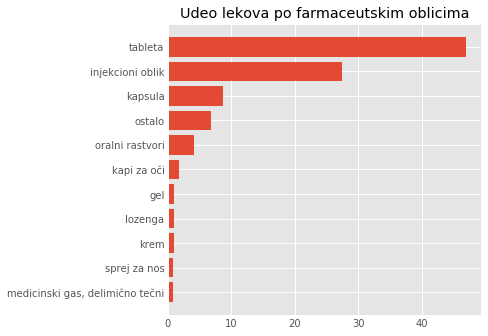

In [86]:
fig2, ax2 = plt.subplots()
plt.style.use('ggplot')
plt.barh(oblici.index, oblici, tick_label = oblici.index)
plt.title('Udeo lekova po farmaceutskim oblicima')
ax2.invert_yaxis()
fig2.set_size_inches(5, 5)
plt.show()

Najveći broj registrovanih lekova je formulisan kao oralni oblik (tableta, kapsula, oralni rastvor), što ne iznenađuje jer je ovo i najčešći put primene leka.

# Režim izdavanja lekova

In [47]:
rezim = lekovi['rezim_izdavanja'].value_counts(normalize=True)*100

Režim izdavanja predstavlja način na koji se lekovi izdaju pacijentu. Na sajtu Agencije za lekove i medicinska sredstva smo pronašli tumačenja ovih skraćenica:
- R - lek koji se može izdati samo uz lekarski recept
- BR - lek koji se može izdati bez lekarskog recepta
- Z - lek koji se može upotrebljavati u zdravstvenoj ustanovi
- SZ - lek koji se može upotrebljavati samo u stacionaroj zdravstvenoj ustanovi
- SZR - lek koji se može upotrebljavati u stacionaroj zdravstvenoj ustanovi; izuzetno, uz recept
- NR - paragrafici (lekovi koji sadrže psihoaktivnu kontrolisanu supstancz)
- ZN - paragrafici koji se mogu upotrebljavati samo u stacionarnoj zdravstvenoj ustanovi
- SZN - lek se može upotrebljavati u stacionarnoj zdravstvenoj ustanovi, izuzetno lek se može izdavati i uz Rp, u cilju nastavka terapije kod kuće, što mora biti naznačeno i overeno na poleđini recepta

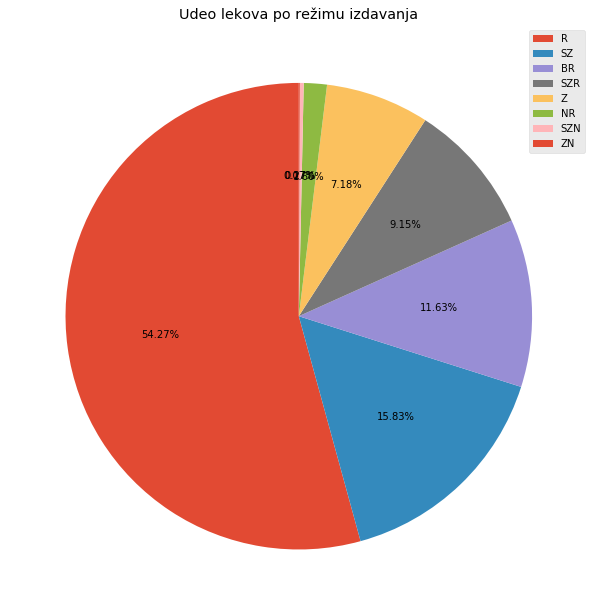

In [114]:
fig3, ax3 = plt.subplots()
plt.style.use('ggplot')
plt.pie(rezim, autopct = '%.2f%%', startangle=90)
plt.legend(labels = rezim.index)
plt.title('Udeo lekova po režimu izdavanja')
fig3.set_size_inches(10, 10)
plt.show()

Oko 12% registrovanih lekova se može izdati bez recepta u apoteci kao OTC ("over the counter") lek.

# Najčešće registrovani lekovi

Najčešće registrovani lekovi iz tri najzastupljenije anatomske grupe:

In [107]:
lekovi[lekovi['anatomska_grupa'] == 'C']['inn'].value_counts().head(20)

bisoprolol                              61
rosuvastatin                            54
perindopril, amlodipin, indapamid       44
atorvastatin                            35
ramipril                                35
amlodipin                               34
valsartan, amlodipin                    27
valsartan, hidrohlortiazid              27
telmisartan, hidrohlortiazid            22
valsartan                               22
perindopril, amlodipin                  21
atorvastatin, amlodipin, perindopril    20
ramipril, hidrohlortiazid               20
telmisartan                             19
perindopril                             19
metoprolol                              18
enalapril                               18
perindopril, indapamid                  16
lizinopril                              16
simvastatin                             16
Name: inn, dtype: int64

Od kardioloških lekova najčešće su registrovani lekovi za povišen krvni pritisak i statini (lekovi za povišen holesterol u krvi).

In [108]:
lekovi[lekovi['anatomska_grupa'] == 'N']['inn'].value_counts().head(20)

pregabalin                        43
risperidon                        37
paracetamol                       32
levetiracetam                     32
aripiprazol                       32
escitalopram                      31
kvetiapin                         27
donepezil                         26
olanzapin                         24
oksikodon                         21
pramipeksol                       19
topiramat                         18
lamotrigin                        17
alprazolam                        17
rivastigmin                       16
oksikodon, nalokson               16
fentanil                          15
levodopa, karbidopa, entakapon    15
propofol                          15
zolpidem                          14
Name: inn, dtype: int64

In [109]:
lekovi[lekovi['anatomska_grupa'] == 'L']['inn'].value_counts().head(20)

paklitaksel                     26
ciklosporin                     24
lenalidomid                     23
imatinib                        22
bendamustin                     20
irinotekan                      19
oksaliplatin                    18
bortezomib                      16
adalimumab                      15
interferon beta-1a              14
filgrastim                      14
rituksimab                      14
pemetreksed                     13
epirubicin                      13
metotreksat                     13
fluorouracil                    13
erlotinib                       12
gemcitabin                      12
tegafur, gimeracil, oteracil    12
cisplatin                       11
Name: inn, dtype: int64

Najviše registrovani OTC lekovi:

In [111]:
lekovi[lekovi['rezim_izdavanja'] == 'BR']['inn'].value_counts().head(20)

ibuprofen                                                         42
acetilsalicilna kiselina                                          30
paracetamol                                                       24
ksilometazolin                                                    22
benzidamin                                                        16
povidon                                                           16
ambroksol                                                         12
natrijum-alginat, natrijum-hidrogenkarbonat, kalcijum-karbonat    11
bršljan (Hedera helix L.), suvi ekstrakt lista                    11
diklofenak                                                        11
acetilcistein                                                     11
loratadin                                                         10
diosmin                                                           10
paracetamol, feniramin, askorbinska kiselina                      10
pantoprazol                       

Kao što vidimo, najčešće registrovani OTC preparati su analgetici i antipiretici, kao i sredstva za lečenje simptoma prehlade.